<a href="https://colab.research.google.com/github/pri538/Click-The-Edible-Game/blob/main/HandwrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import losses
from keras import optimizers
from keras import metrics
%matplotlib inline

In [85]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

In [86]:
len(X_train)

60000

In [87]:
len(X_test)

10000

In [88]:
X_train[0].shape

(28, 28)

In [89]:
X_train=X_train/255
X_test=X_test/255

In [90]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

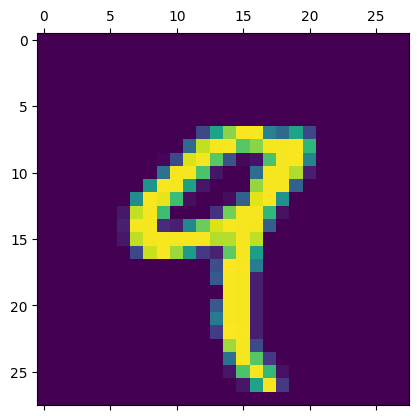

In [91]:
plt.matshow(X_train[4])

In [92]:
y_train[4]

9

In [93]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [94]:
flat=X_train.reshape(len(X_train),28*28)
flat.shape

test_flat=X_test.reshape(len(X_test),28*28)
test_flat.shape

(10000, 784)

In [95]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4660 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3032 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9252


In [96]:
model.evaluate(test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9243


[0.2712009847164154, 0.9243000149726868]

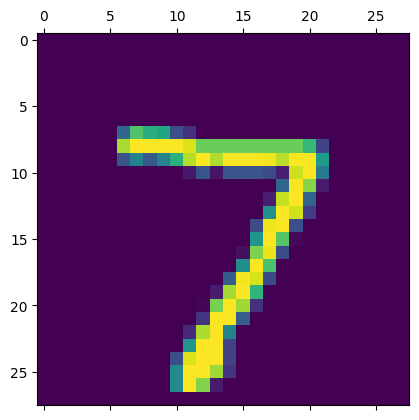

In [97]:
plt.matshow(X_test[0])

In [98]:
y_pred=model.predict(test_flat)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([3.0169526e-02, 4.0124701e-07, 6.7181222e-02, 9.6249670e-01,
       2.8177907e-03, 1.2986992e-01, 1.2806470e-06, 9.9981278e-01,
       7.7864394e-02, 6.0895091e-01], dtype=float32)

In [99]:
np.argmax(y_pred[0])

7

In [100]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [101]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [102]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1109,    4,    2,    0,    1,    4,    2,   13,    0],
       [   6,    8,  936,   16,    9,    4,    9,   11,   30,    3],
       [   3,    0,   22,  921,    0,   27,    2,   15,   15,    5],
       [   2,    1,   10,    0,  919,    0,    7,    5,   10,   28],
       [  11,    3,    7,   32,    8,  783,    9,    6,   27,    6],
       [  15,    3,   14,    1,    8,   12,  901,    2,    2,    0],
       [   1,    6,   22,    6,    6,    0,    0,  964,    2,   21],
       [  11,    6,    8,   30,    9,   30,    8,   14,  853,    5],
       [  11,    7,    1,   11,   34,   10,    0,   41,    3,  891]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

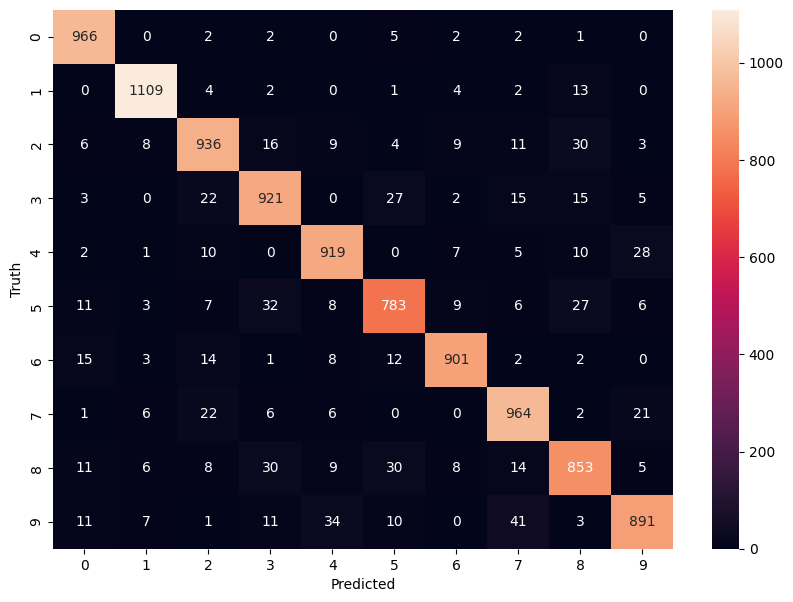

In [103]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [104]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),


])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2678 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1204 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0834 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9845


In [105]:
model.evaluate(test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9735


[0.08663052320480347, 0.9735000133514404]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

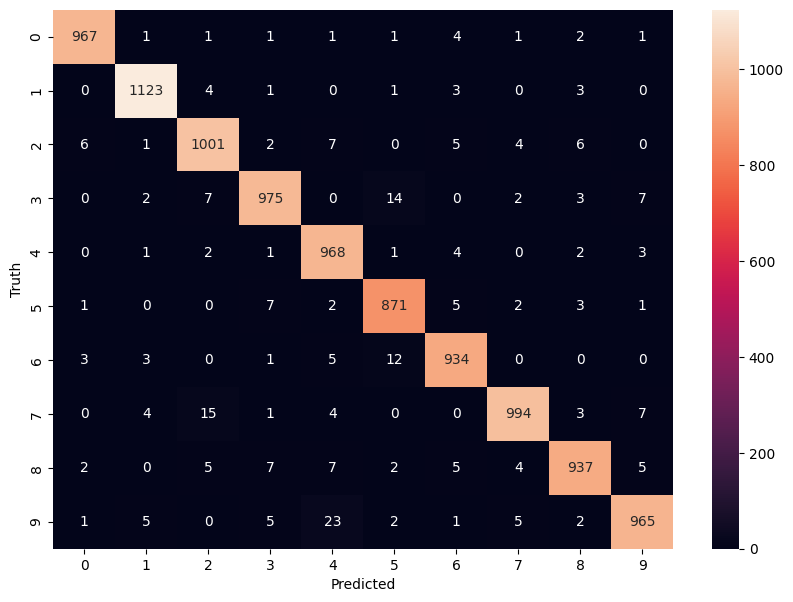

In [107]:
y_pred=model.predict(test_flat)
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')